In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df=pd.read_csv("Telco_Customer_churn.csv")
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
df["customerID"].duplicated().sum()

np.int64(0)

In [17]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [20]:
df.head(21)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


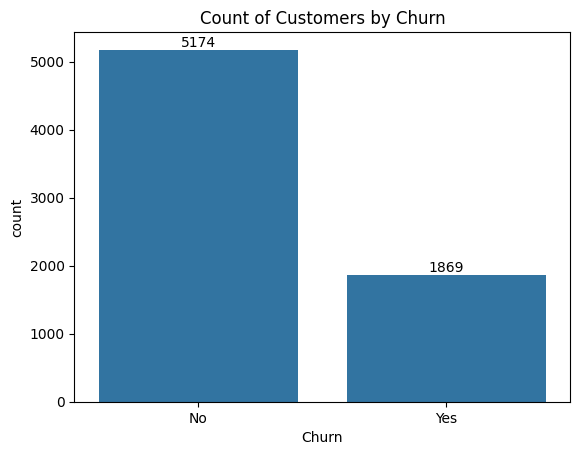

In [30]:
ax= sns.countplot(x="Churn",data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

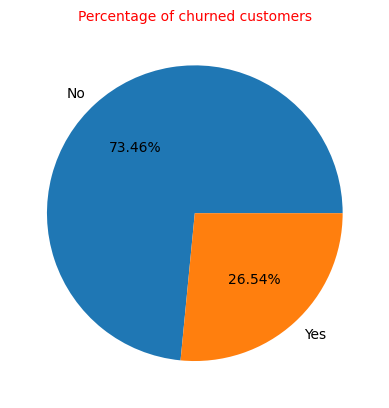

In [31]:
gb= df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels = gb.index , autopct="%1.2f%%")
plt.title("Percentage of churned customers", fontsize = 10 , color= "red")
plt.show()

#26.54% of our customers are churned out 

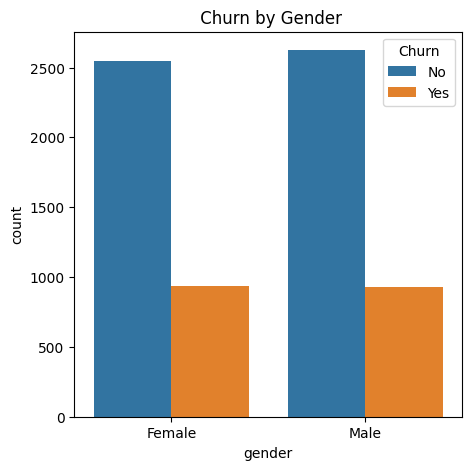

In [33]:
plt.figure(figsize = (5,5))
sns.countplot(x= "gender",data = df, hue="Churn")
plt.title(" Churn by Gender")
plt.show()

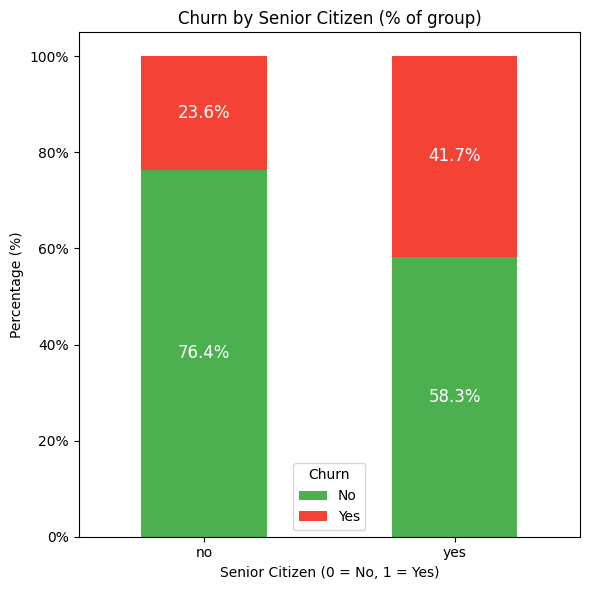

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Step 1: Calculate churn percentages per SeniorCitizen group
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
perc = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 2: Plot the percentage-stacked bar chart
fig, ax = plt.subplots(figsize=(6,6))
perc.plot(kind='bar', stacked=True,
          color=['#4CAF50', '#F44336'], ax=ax)
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Senior Citizen (0 = No, 1 = Yes)')
ax.set_title('Churn by Senior Citizen (% of group)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(title='Churn')

# Step 3: Annotate percentage labels in the center of each segment
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        ax.annotate(f'{height:.1f}%', (x, y),
                    ha='center', va='center',
                    color='white', fontsize=12)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


 #comparative a greater percentage of people in senior citizen category have churned 

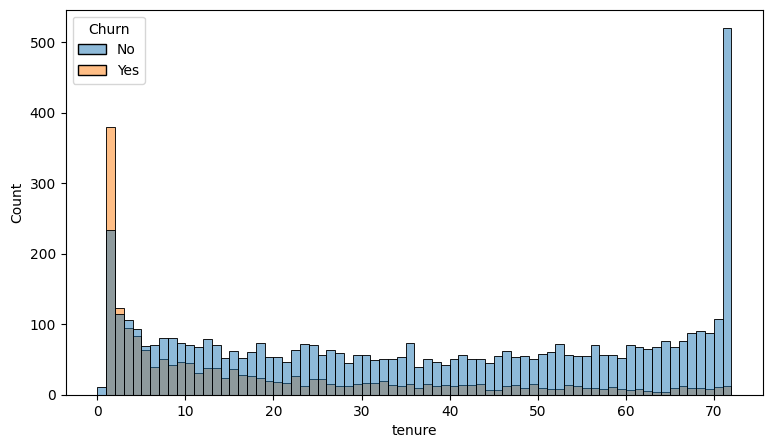

In [40]:
plt.figure(figsize = (9,5))
sns.histplot(x = "tenure" , data = df , bins = 72, hue="Churn")
plt.show()

# People who have used our services for long time have stayed and people who have used our services for 1 and 2 months have churned 


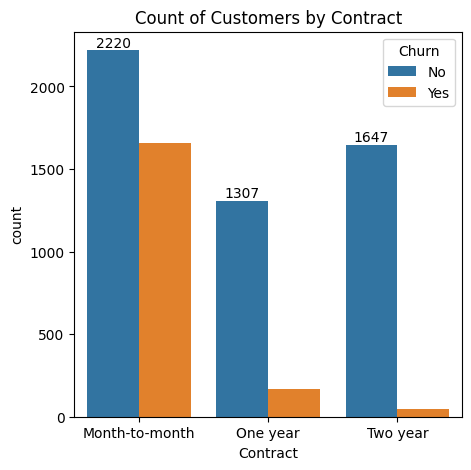

In [42]:
plt.figure(figsize = (5,5))
ax= sns.countplot(x="Contract",data = df , hue ="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()plt.figure(figsize = (5,5))
ax= sns.countplot(x="Contract",data = df , hue ="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()plt.figure(figsize = (5,5))
ax= sns.countplot(x="Contract",data = df , hue ="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()plt.figure(figsize = (5,5))
ax= sns.countplot(x="Contract",data = df , hue ="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

# People who have month to month contract are likely to churn then from those who one or two year contract 

In [43]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

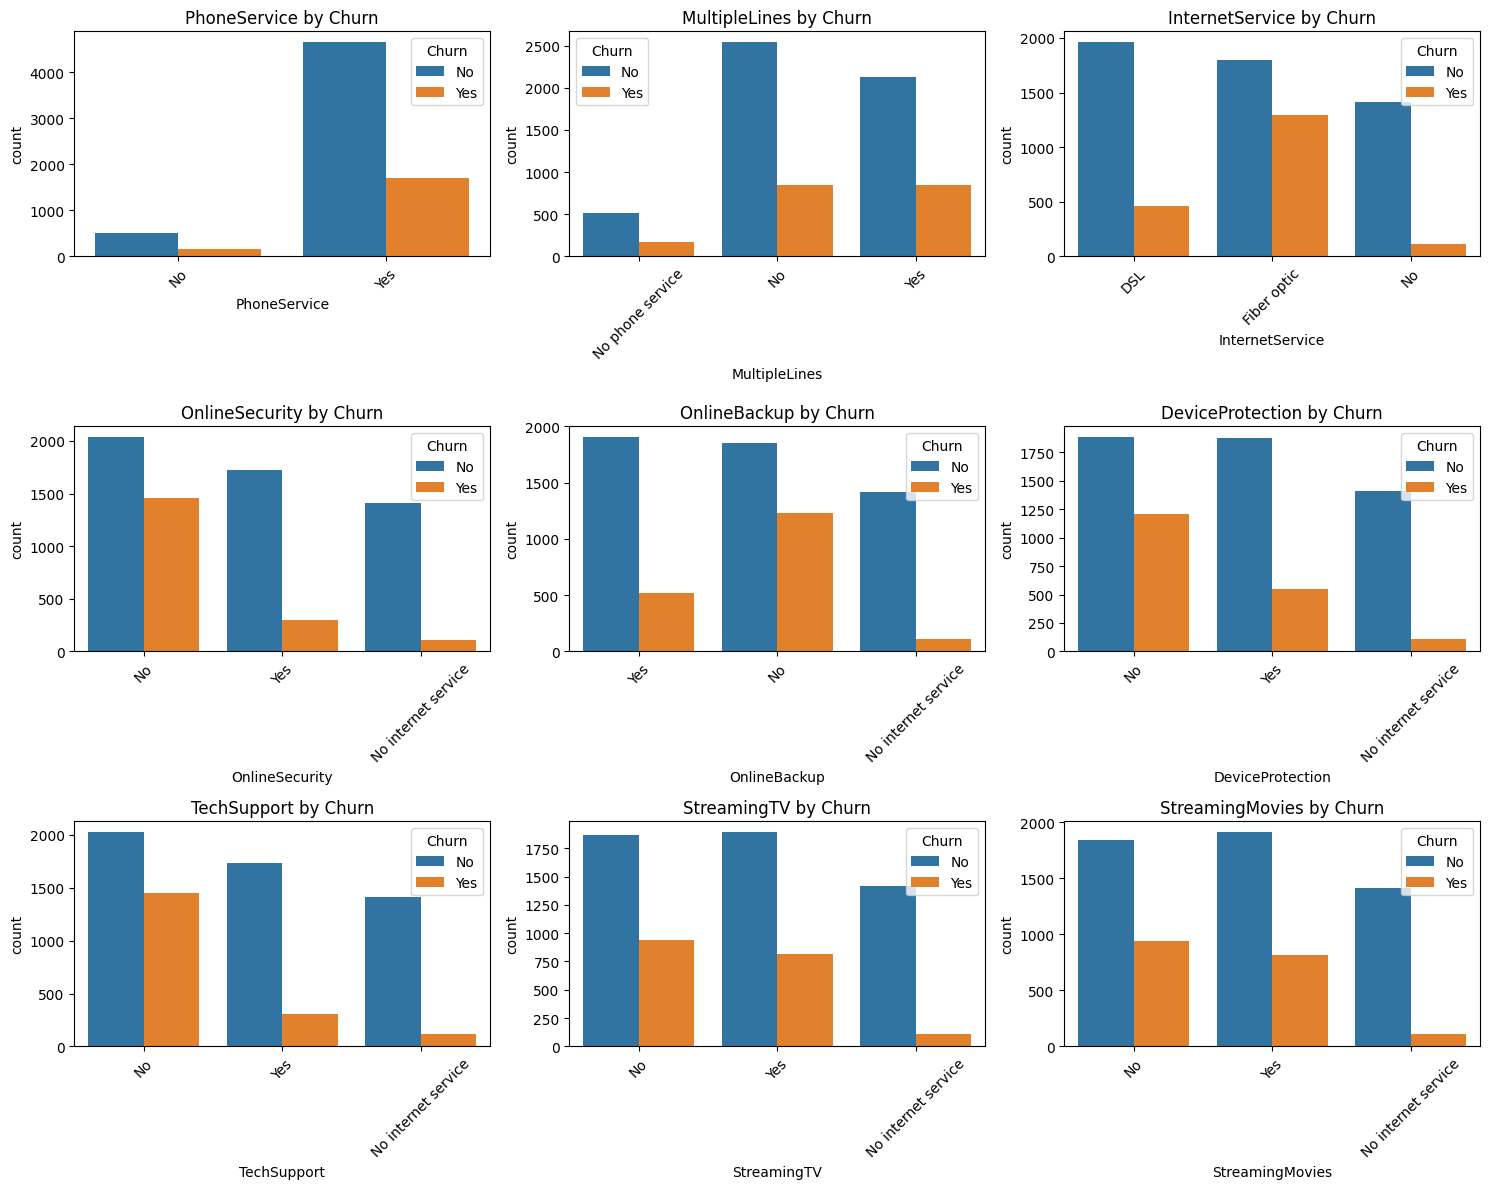

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

n = len(cols)
cols_per_row = 3
rows = (n + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 4 * rows), sharey=False)
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.countplot(x=col, hue='Churn', data=df, ax=ax)
    ax.set_title(f'{col} by Churn')
    ax.legend(title='Churn')
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for ax in axes[len(cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


Customers on fiber-optic internet show the highest churn, while phone service and multiple lines have minimal churn impact. Not subscribing to extras like security, backup, device protection, or tech support increases churn risk, whereas streaming services moderately raise it. Bundled internet and add-ons tend to exhibit stronger churn dynamics.

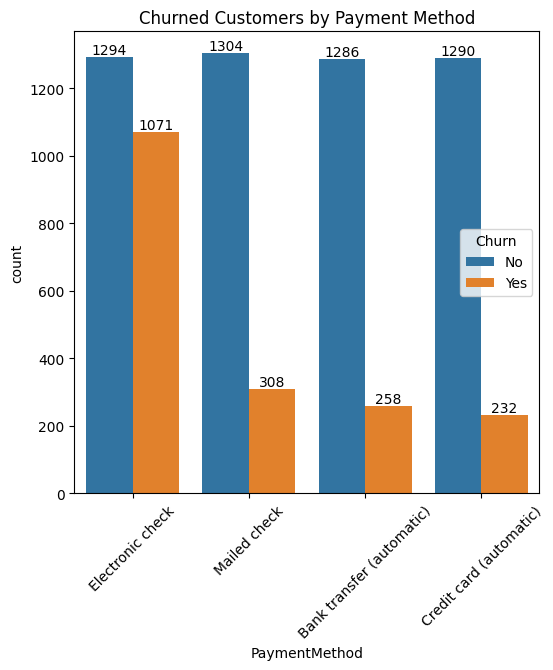

In [49]:
plt.figure(figsize = (6,6))
ax= sns.countplot(x="PaymentMethod",data = df , hue ="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation =45)
plt.show()

Customer is likely to churn when he is using payment check as a payemnt method 